# Assignment Week 5
## Group Assignment (Group 10)

#### 1. Consider the fixed-point iteration described by
$$
\begin{aligned}
x_{n+1}= g( x_n)=\frac{1}{2}\left(x_n+\frac{a^2}{x_n}\right)
\end{aligned}
$$
#### Show that the iteration converges to $a$ for any initial point $x_1 > 0$, and that the convergence is quadratic.

**Answer**:
$$
\begin{gathered}
g(x)=\frac{1}{2}\left(x+\frac{a^2}{x}\right)\\
g'(x)=\frac{1}{2}\left(1-\frac{a^2}{x^2}\right)\Rightarrow g'(a)=0\\
g''(x)=\frac{a^2}{x^3}\Rightarrow g''(a)=\frac{1}{a}\neq 0
\end{gathered}
$$

When $x\in I=\left[\dfrac{2}{3}a,+\infty\right]$, $g'(x)<1$.

$\forall\ x_1>0,\ x_2=g(x_1)=\dfrac{1}{2}\left(x_1+\dfrac{a^2}{x_1}\right)>a\Rightarrow x_2\in I$.

And $g(a)=a$, $a\in I$. So due to **the theorem in Chapter 3 (root)**, $\{x_n\}$ must converge to $a$.

$$
\begin{gathered}
\frac{x_{n+1}-a}{(x_n-a)^2}=\frac{g(x_n)-g(a)}{(x_n-a)^2}=\frac{g''(\xi_n) (x_n-a)^2}{2(x_n-a)^2}\quad (a<\xi_n<x_n)\\
\lim_{n\to \infty}\limits\frac{x_{n+1}-a}{(x_n-a)^2}=\frac{g''(a)}{2}\neq 0
\end{gathered}
$$

Therefore the convergence is quadratic.

#### 2. A particle of mass $m$ is bound within a 1-D square well of radius $a$
$$
V\left(  x\right)  =\begin{cases}
-V_{0}, & \text{for }\left\vert x\right\vert \leq a,\\
0, & \text{for }\left\vert x\right\vert \geq a
\end{cases}
$$
#### Quantum Mechanics shows that the energies of the bound states $E<0$ are solutions of the transcendental equations
$$
\begin{aligned}
\sqrt{10+E}\tan\left(  \sqrt{10+E}\right)    & =\sqrt{-E}\;\left(
\text{even}\right)  \\
\sqrt{10+E}\cot\left(  \sqrt{10+E}\right)    & =-\sqrt{-E}\;\left(  \text{odd}\right)\end{aligned}
$$
#### where even and odd refer to the symmetry of the wave function. Here we have chosen units such that $\hbar=1,$ $2m=1,$ $a=1$, and $V_{0}=10.$

#### a) Find several bound-state energies for even wave function.

Let $x=\sqrt{10+E}$, hence the even wave function is $x\tan(x)-\sqrt{10-x^2}=0$.

Plot the equation to be solved. From the plot we can see two roots which are respectively in the range [0.0,1.5], and [3.150, 3.162].

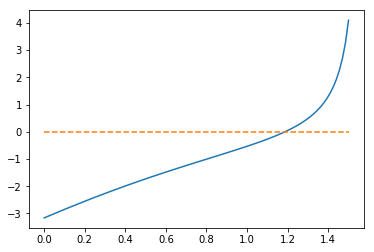

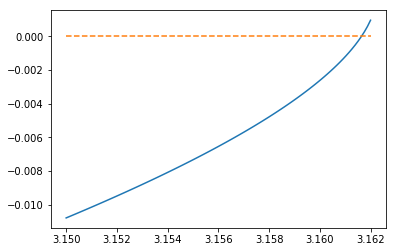

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

y = lambda x: (-np.sqrt(10-x**2)+x*np.tan(x))*np.exp(-x)
h = lambda x: 0*x

x = np.linspace(0, 1.5, 100)
plt.plot(x,y(x))
plt.plot(x, h(x), linestyle = '--')
plt.show()

x = np.linspace(3.150,3.162,100)
plt.plot(x,y(x))
plt.plot(x, h(x), linestyle = '--')
plt.show()

In [2]:
# The bisection algorithm
import sys
import math

def bisection(f, x_L, x_R, eps):
    f_L = f(x_L)
    if f_L*f(x_R) > 0:
        print("""Error! Function does not have opposite 
                 signs at interval endpoints!""")
        sys.exit(1)
    
    x_M = (x_L + x_R)/2.0
    f_M = f(x_M)
    iteration_counter = 1

    while abs(f_M) > eps:
        if f_L*f_M > 0:  
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
        
        x_M = (x_L + x_R)/2
        f_M = f(x_M)
        iteration_counter = iteration_counter + 1
    
    return x_M, iteration_counter




In [3]:
V0 = 10
def f(x):
    return x*math.tan(x)-(V0-x**2)**(0.5)

solution1, no_iterations = bisection(f, 0, 1.5, eps=1.0e-6)
print('bound-state energy 1 : {:.5f}'.format(solution1**2-10))

solution2, no_iterations = bisection(f, 3.150, 3.162, eps=1.0e-6)
print('bound-state energy 2: {:.5f}'.format(solution2**2-10))

bound-state energy 1 : -8.59279
bound-state energy 2: -0.00402


#### b) See if making the potential deeper, say, by changing the 10 to a 20, or a 30, produces a larger number of, or deeper bound states. Also make the potential shallower, and see how the energies change. Please make a diagram of the ground state energy versus the depth of the potential.

In [4]:
Vs = [10]  # store the value of different V0, the depth of potential
Es = [solution1**2-10]  # store the value of different E0, the ground energy

When $V_{0}=20$, the smallest root is in the range [0.0, 1.4].

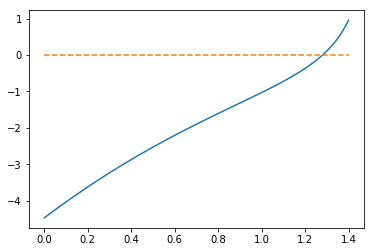

In [5]:
V0 = 20
Vs.append(V0)

y = lambda x: (-np.sqrt(20-x**2)+x*np.tan(x))*np.exp(-x)
h = lambda x: 0*x

x = np.linspace(0, 1.4, 100)
plt.plot(x,y(x))
plt.plot(x, h(x), linestyle = '--')
plt.show()

In [6]:
solution, no_iterations = bisection(f, 0, 1.4, eps=1.0e-6)
Es.append(solution**2-10)
print('ground state energy: {:.5f}'.format(solution**2-10))

ground state energy: -8.36052


When $V_{0}=30$, the smallest root is in the range [0.0, 1.4].

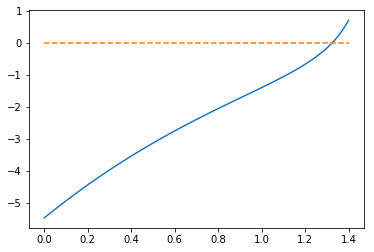

In [7]:
V0 = 30
Vs.append(V0)

y = lambda x: (-np.sqrt(30-x**2)+x*np.tan(x))*np.exp(-x)
h = lambda x: 0*x

x = np.linspace(0, 1.4, 100)
plt.plot(x,y(x))
plt.plot(x, h(x), linestyle = '--')
plt.show()

In [8]:
solution, no_iterations = bisection(f, 0, 1.4, eps=1.0e-6)
Es.append(solution**2-10)
print('ground state energy: {:.5f}'.format(solution**2-10))

ground state energy: -8.24111


When $V_{0}=5$, the smallest root is in the range [0.0, 1.4].

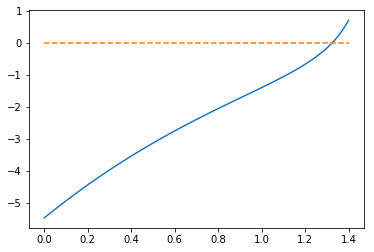

In [9]:
V0 = 5
Vs.append(V0)

y = lambda x: (-np.sqrt(30-x**2)+x*np.tan(x))*np.exp(-x)
h = lambda x: 0*x

x = np.linspace(0, 1.4, 100)
plt.plot(x,y(x))
plt.plot(x, h(x), linestyle = '--')
plt.show()

In [10]:
solution, no_iterations = bisection(f, 0, 1.4, eps=1.0e-6)
Es.append(solution**2-10)
print('ground state energy: {:.5f}'.format(solution**2-10))

ground state energy: -8.85250


When $V_{0}=1$, the smallest root is in the range [0.0, 1.4].

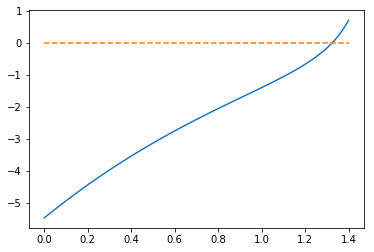

In [11]:
V0 = 1
Vs.append(V0)

y = lambda x: (-np.sqrt(30-x**2)+x*np.tan(x))*np.exp(-x)
h = lambda x: 0*x

x = np.linspace(0, 1.4, 100)
plt.plot(x,y(x))
plt.plot(x, h(x), linestyle = '--')
plt.show()

In [12]:
solution, no_iterations = bisection(f, 0, 1, eps=1.0e-6)
Es.append(solution**2-10)
print('ground state energy: {:.5f}'.format(solution**2-10))

ground state energy: -9.45375


List the values of $V_0$ and $E_0$, and make a scatter plot of them:

|$\quad$$V_{0}$$\quad$|$\quad$$E_0$$\quad$|
|:---:|:----:|
|1|-9.45375|
|5|-8.85250|
|10|-8.59279|
|20|-8.36052|
|30|-8.24111|

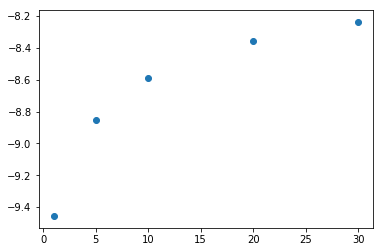

In [13]:
plt.scatter(Vs, Es)
plt.show()

#### 3. Find the bond length of NaCl using the potential model discussed in the lecture, 
$$
V(r)=-\frac{e^2}{r}+V_0\exp(-r/r_0)
$$
#### Please use $e^2=14.4$ $\text{Å}\cdot eV$, $V_0=1.09\times 10^3 \text{ eV}$, $r_0=0.330\text{ Å}$. Write your own program and compare your result with the results from Python package `scipy.optimize`.

Use Newton-Raphson Algorithm:

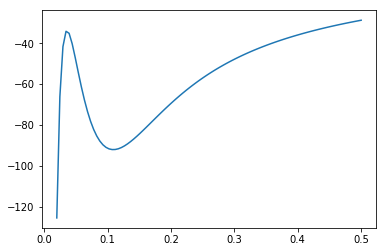

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# the parameters
e2 = 14.4
V0 = 1.09e3
r0 = 0.0330

# function V, V'=f and v''=dfdx
V = lambda r: -e2 / r + V0 * np.exp(-r / r0)
f = lambda r: e2 / r**2 - V0 * np.exp(-r / r0) / r0
dfdx = lambda r: -2*e2 / r**3 + V0 * np.exp(-r / r0) / r0**2

# minimun with g, g'=f, g''=dfdx, initial x and tolerence eps
def minim(g, f, dfdx, x, eps):
    f_value = f(x)
    g_value = g(x)
    count = 0
    # newton method
    while abs(f_value) > eps and count < 1000:
        try:
            dx = - f_value/dfdx(x)
            x = x + dx
        except ZeroDivisionError:
            print('Error! - derivative zero for x = ', x)
            sys.exit(1) # Abort with error

        if g(x) < g_value:
            g_value = g(x)
            f_value = f(x)
            count += 1
        else:
            dx = -dx
    
    print('The function has a minimun', g(x), 'at', x)

# plot the function V
r = np.linspace(0.02, 0.5, 100)
plt.plot(r, V(r))
plt.show()

We can see the function $V$ has a minimun around 0.1, so we set the initial $x=0.1$.

In [15]:
x = 0.1
eps = 1e-10
minim(V, f, dfdx, x, eps)

The function has a minimun -92.02930596074631 at 0.10917606756518317


So the bond length is about $0.109\ \text{Å}$.

Then we use the method `minimize` in Python package `scipy.optimize`.

In [16]:
from scipy.optimize import *

# the parameters
e2 = 14.4
V0 = 1.09e3
r0 = 0.0330

# function V
V = lambda r: -e2 / r + V0 * np.exp(-r / r0)

sol = minimize(V, 0.2)  # set the initial x = 0.2
print(sol.message)
print('V has a minimun', float(sol.fun), 'at r =',float(sol.x))

Optimization terminated successfully.
V has a minimun -92.02930596074592 at r = 0.10917606020646162


The result is almost the same as the above.

#### 4. Consider the nonlinear system 
$$
\begin{cases}
2e^x+y=0\\
3x^2+4y^2=8
\end{cases}
$$
#### a) Locate the roots graphically.

#### b) Based on the location of the roots, find the roots and compare your numerical results with the results from Python package `scipy.optimize`

In [17]:
#Implementation of Newton’s method for systems of nonlinear algebraic equations 
import numpy as np
def Newton_system(F, J, x, eps):
    
    F_value = F(x)
    
    F_norm = np.linalg.norm(F_value, ord=2) # l2 norm of vector
    
    iteration_counter = 0
    
    while abs(F_norm) > eps and iteration_counter < 1000:
        delta = np.linalg.solve(J(x), -F_value)    # J(x) delta = -F
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter = iteration_counter + 1
        
    # Here, either a solution is found, or too many iterations
    if abs(F_norm) > eps:
        iteration_counter = -1
    return x, iteration_counter

In [18]:
def test_Newton_system():
    from numpy import cos, sin, pi, exp
    
    def F(x):
        return np.array(
            [2*exp(x[0])+x[1],3*x[0]**2+4*x[1]**2-8])
    def J(x):
        return np.array(
            [[2*exp(x[0]), 1], [6*x[0],8*x[1]]])
    
    expected = np.array([1, 0])
    x, n = Newton_system(F, J, x=np.array([2, -1]), eps=0.0001)
    print('x = {}'.format(x[0]))
    print('y = {}'.format(x[1]))

In [19]:
if __name__ == '__main__':
    test_Newton_system()

x = -0.3734272049040424
y = -1.3767410560514952


Now the method `root` from `scipy.optimize`.

In [20]:
from scipy.optimize import*
from numpy import cos, sin, pi, exp
def F(x):
    return np.array([2*exp(x[0])+x[1],3*x[0]**2+4*x[1]**2-8])
def J(x):
    return np.array(
            [[2*exp(x[0]), 1], [6*x[0],8*x[1]]])

In [21]:
from scipy import optimize
sol = optimize.root(F, [0, 0], jac=J, method='hybr')
print(sol.x)

[-0.37342874 -1.37674007]


My numerical results and results from Python package scipy.optimize are almost equal. The results from Python package scipy.optimize are more accurate.

#### 5. Consider a linear $2\times 2$ system (with unknowns $x_1$ and $x_2$) described by its augmented matrix 
$$
\begin{bmatrix}\left.\begin{matrix}\varepsilon & 1\\1 & 1\end{matrix}\right\vert\begin{matrix}2\\1\end{matrix}\end{bmatrix}
$$
#### where $\epsilon > 0$ is a very small constant.

#### a) Solve by Gauss elimination without partial pivoting.

For example, set $\varepsilon=0.01$.

In [22]:
import numpy as np

eps = 0.01
Ab = np.array([[eps, 1, 2], [1, 1, 1]])

# reduction
Ab[1] = -Ab[0] / Ab[0][0] * Ab[1][0] + Ab[1]
Ab[0] = -Ab[1] / Ab[1][1] * Ab[0][1] + Ab[0]

# back substitution
Ab[0] = Ab[0] / Ab[0][0]
Ab[1] = Ab[1] / Ab[1][1]

print('x1 =', Ab[0][2])
print('x2 =', Ab[1][2])

x1 = -1.0101010101009944
x2 = 2.01010101010101


#### b) Solve by Gauss elimination with partial pivoting. Compare the results and discuss their validity.

In [23]:
import numpy as np

eps = 0.01

Ab = np.array([[1, 1, 1], [eps, 1, 2]])

# reduction
Ab[1] = -Ab[0] / Ab[0][0] * Ab[1][0] + Ab[1]
Ab[0] = -Ab[1] / Ab[1][1] * Ab[0][1] + Ab[0]

# back substitution
Ab[0] = Ab[0] / Ab[0][0]
Ab[1] = Ab[1] / Ab[1][1]

print('x1 =', Ab[0][2])
print('x2 =', Ab[1][2])

x1 = -1.01010101010101
x2 = 2.01010101010101


We can see that the $x_1$ without partial pivoting becomes less accurate at the tail of the decimals, which indicates that Gauss elimination *with* partial pivoting is more valid.

#### 6. Solve the system of equations $Ax=b$ with a well-behaved matrix
$$
A_{ii}=n,\text{ }A_{i\neq j}=1
$$
#### by applying 

#### a) LU decomposition, (Hint: You can use Python module `scipy.linalg.lu_solve`)

#### b) Cholesky decomposition, (Hint: You can use Python module `numpy.linalg.cholesky`)

#### The right-hand side is $b=A\begin{pmatrix}
1\\
2\\
\vdots\\
n
\end{pmatrix}$, hence the exact solution is $x=\begin{pmatrix}
1\\
2\\
\vdots\\
n
\end{pmatrix}$.

For example, n=3, hence A=[[1,1,1],[1,2,1],[1,1,3]], b=[6,8,12] and the solution needs to be x=[1,2,3].

In [24]:
# LU decomposition
import numpy as np 
import scipy as scipy
from scipy import linalg
def LU_decomposition(A):    
    n=len(A[0])    
    L = np.zeros([n,n])    
    U = np.zeros([n,n])    
    for i in range(n):        
        L[i][i]=1        
        if i==0:            
            U[0][0] = A[0][0]            
            for j in range(1,n):                
                U[0][j]=A[0][j]                
                L[j][0]=A[j][0]/U[0][0]        
        else:
                for j in range(i, n):
                    temp=0                    
                    for k in range(0, i):                        
                        temp = temp+L[i][k] * U[k][j]                    
                    U[i][j]=A[i][j]-temp                
                for j in range(i+1, n):
                    temp = 0        
                    for k in range(0, i ):              
                        temp = temp + L[j][k] * U[k][i]             
                    L[j][i] = (A[j][i] - temp)/U[i][i]
    return L,U
if __name__ == '__main__':     
    A=[[1,1,1],[1,2,1],[1,1,3]]  # matrix A: n=3
    b=np.array([6,8,12])
    L,U=LU_decomposition(A) 
    print(L,'\n',U)
    x_1 = np.linalg.solve(L,b)
    x_2= np.linalg.solve(U,x_1)
    print('The solution is x=',x_2)

[[1. 0. 0.]
 [1. 1. 0.]
 [1. 0. 1.]] 
 [[1. 1. 1.]
 [0. 1. 0.]
 [0. 0. 2.]]
The solution is x= [1. 2. 3.]


This time we use Python module `numpy.linalg.cholesky`.

In [25]:
#Cholesky decomposition
import numpy as np 
import scipy as scipy
from scipy import linalg
b=np.array([6,8,12])
A = np.array([[1,1,1],[1,2,1],[1,1,3]])
L = np.linalg.cholesky(A)
LT = np.transpose(L)
print(L,'\n',LT)
x_1 = np.linalg.solve(L,b)
x_2= np.linalg.solve(LT,x_1)
print('The solution is x=',x_2)

[[1.         0.         0.        ]
 [1.         1.         0.        ]
 [1.         0.         1.41421356]] 
 [[1.         1.         1.        ]
 [0.         1.         0.        ]
 [0.         0.         1.41421356]]
The solution is x= [1. 2. 3.]


#### 7. **Multiple linear regression** generalizes simple linear regression by allowing several predictor variables instead of just one.
#### In matrix notation, we have an overdetermined system of equations 
$$
\mathbf{y=X a}
$$

#### where
$$
\begin{pmatrix}
y_{1}\\
y_{2}\\
\vdots\\
\\
\\
y_{n}%
\end{pmatrix}=\begin{pmatrix}
1 & x_{11} & x_{12} & \cdots & x_{1p}\\
1 & x_{21} & x_{22} & \cdots & x_{2p}\\
\vdots & \vdots & \ddots &  & \vdots\\
&  &  &  & \\
1 &  &  &  & \\
1 & x_{n1} & x_{n2} & \cdots & x_{np}%
\end{pmatrix} \begin{pmatrix}
a_{0}\\
a_{1}\\
\vdots\\
\\
a_{p}%
\end{pmatrix}
$$

#### Our goal is to find a vector $\mathbf{a}$ that minimizes $\mathbf{Xa-y}$ . A numerically stable algorithm for computing $\mathbf{a}$ is to compute QR factorization $\mathbf{X=QR}$, then solve the triangular system $\mathbf{Ra=Q^{T}y}$ via back substitution.

#### The expression $z = ax^{2} +bxy +cy^{2} +dx +ey +f$ is known as a **quadratic form**. The set of points $(x, y)$, where $z = 0$, is a conic section. It can be an ellipse, a parabola, or a hyperbola, depending on the sign of the discriminant $b^{2}-4ac$.

#### A planet follows an elliptical orbit. Here are ten observations of its position in the $(x, y)$ plane:

 ```
 x = [1.02 .95 .87 .77 .67 .56 .44 .30 .16 .01];
 y = [0.39 .32 .27 .22 .18 .15 .13 .12 .13 .15];
 ```

#### a) Determine the coefficients in the quadratic form that fits these data in the least squares sense. Plot the orbit with $x$ on the $x$-axis and $y$ on the $y$-axis. Superimpose the ten data points on the plot.

We set $f=1$. Then $ax^2+bxy+cy^2+dx+ey=-1$. Solve the matrix equation
$$
\begin{pmatrix}
-1\\
-1\\
\vdots\\
\\
-1\\
-1%
\end{pmatrix}=\begin{pmatrix}
x_1^2 & x_1 y_1 & y_1^2 & x_1 & y_1\\
x_2^2 & x_2 y_2 & y_2^2 & x_2 & y_2\\
\vdots & \vdots & \ddots &  & \vdots\\
&  &  &  & \\
x_9^2 &  &  &  & \\
x_{10}^2 & x_{10} y_{10} & y_{10}^2 & x_{10} & y_{10}%
\end{pmatrix} \begin{pmatrix}
a\\
b\\
\vdots\\
\\
e%
\end{pmatrix}
\quad
\text{or}
\quad
\mathbf{y_s}=\mathbf{X}\mathbf{a_s}
$$

for the coefficients $\mathbf{a_s}=[a,b,c,d,e]$.

[a b c d e f] = [2.253795 0.006325 5.522183 -1.289810 -7.377354 1.000000]


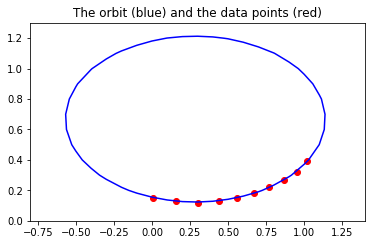

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# the observations
x_ = np.array([1.02, .95, .87, .77, .67, .56, .44, .30, .16, .01])
y_ = np.array([0.39, .32, .27, .22, .18, .15, .13, .12, .13, .15])

# the matrix X 
X = np.empty([10,5])
for i in range(10):
    X[i] = [x_[i]**2, x_[i]*y_[i], y_[i]**2, x_[i], y_[i]]

ys = -np.ones(10)  # ys = [-1, -1, ... , -1]

Q,R = np.linalg.qr(X)  # QR decomposition

# solve R@a_s = Q.T@ys for a_s by back substitution
n = len(R)
a_s = np.empty(n)

bs = Q.T@ys

# back substitution
a_s[n-1] = bs[n-1] / R[n-1][n-1]
for i in range(n-2, -1,-1):
    
    summ = 0
    for k in range(i+1, n):
        summ += R[i][k] * a_s[k]
    
    a_s[i] = (bs[i] - summ) / R[i][i]

# the coefficients
a, b, c, d, e, f = a_s[0], a_s[1], a_s[2], a_s[3], a_s[4], 1

# ellipse equation z = 0
z = lambda x, y: a * x**2 + b *  x * y + c * y**2 + d * x + e * y + f

# print the coefficients
np.set_printoptions(threshold=10, formatter={'float': '{:.6f}'.format})
print('[a b c d e f] =', np.append(a_s,1.0))

# plot the curve and data points
x = np.arange(-0.8, 1.5, 0.1)
y = np.arange(0, 1.4, 0.1)
x, y = np.meshgrid(x,y)
plt.contour(x, y, z(x, y),[0],colors='b')
plt.scatter(x_, y_, color='r')
plt.axis('scaled')
plt.title('The orbit (blue) and the data points (red)')
plt.show()

#### b) This least squares problem is nearly rank deficient. To see what effect this has on the solution, perturb the data slightly by adding to each coordinate of each data point a random number uniformly distributed in the interval $[-.0005, .0005]$. Compute the new coefficients resulting from the perturbed data. Plot the new orbit on the same plot with the old orbit. Comment on your comparison of the sets of coefficients and the orbits.    

Without perturbation:
[a b c d e f] = [2.253795 0.006325 5.522183 -1.289810 -7.377354 1.000000]
With perturbation:
[a b c d e f] = [2.247288 0.005930 5.506920 -1.287540 -7.359742 1.000000]


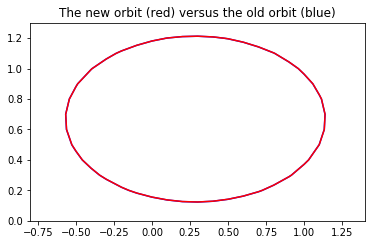

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

# the observations
x_ = np.array([1.02, .95, .87, .77, .67, .56, .44, .30, .16, .01])
y_ = np.array([0.39, .32, .27, .22, .18, .15, .13, .12, .13, .15])

# add perturbation
r = 0.0005*random.random()
x_r = x_ + r
y_r = y_ + r

# the matrix X 
Xr = np.empty([10,5])
for i in range(10):
    Xr[i] = [x_r[i]**2, x_r[i]*y_r[i], y_r[i]**2, x_r[i], y_r[i]]

ys = -np.ones(10)  # ys = [-1, -1, ... , -1]

Q,R = np.linalg.qr(Xr)  # QR decomposition

# solve R@a_s = Q.T@ys for a_s by back substitution
n = len(R)
a_r = np.empty(n)

bs = Q.T@ys

# back substitution
a_r[n-1] = bs[n-1] / R[n-1][n-1]
for i in range(n-2, -1,-1):
    
    summ = 0
    for k in range(i+1, n):
        summ += R[i][k] * a_r[k]
    
    a_r[i] = (bs[i] - summ) / R[i][i]

# the coefficients
ar, br, cr, dr, er, fr = a_r[0], a_r[1], a_r[2], a_r[3], a_r[4], 1

# print the coefficients with and without perturbation
np.set_printoptions(threshold=10, formatter={'float': '{:.6f}'.format})
print('Without perturbation:')
print('[a b c d e f] =', np.append(a_s,1.0))
print('With perturbation:')
print('[a b c d e f] =', np.append(a_r,1.0))

# ellipse equation zr = 0
zr = lambda x, y: ar * x**2 + br *  x * y + cr * y**2 + dr * x + er * y + fr

# plot the curve without and with perturbation
x = np.arange(-0.8, 1.5, 0.1)
y = np.arange(0, 1.4, 0.1)
x, y = np.meshgrid(x,y)
plt.contour(x, y, z(x, y),[0],colors='b')
plt.contour(x, y, zr(x, y),[0],colors='r')
plt.axis('scaled')
plt.title('The new orbit (red) versus the old orbit (blue)')
plt.show()


The new coefficients are just slightly different from the old ones and the new orbit is almost the same as the old one. We can learn from this that small deviation of the data doesn't change the result of the regression.